## 

# Heart disease prediction

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set() # set the default Seaborn style for graphics


In [2]:
heartdata = pd.read_excel("Heart.xlsx")
heartdata.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Heart Disease,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior desc...,0,1,None,None,None,None,Presence,"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Absence,"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,Shows a 75% blockage in the left anterior desc...,0,1,None,None,None,None,Presence,"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,62,1,1,1,145,90,100,1,...,Shows a 80% blockage in the left circumflex co...,0,1,None,None,None,None,Absence,"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,...,Shows a 90% blockage in the right coronary artery,0,1,None,None,None,None,Absence,"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"


In [3]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Name                                             334 non-null    object
 1   Gender                                           334 non-null    object
 2   Age                                              334 non-null    int64 
 3   Chest pain                                       334 non-null    int64 
 4   Shortness of breath                              334 non-null    int64 
 5   Fatigue                                          334 non-null    int64 
 6   Systolic                                         334 non-null    int64 
 7   Diastolic                                        334 non-null    int64 
 8   Heart rate (bpm)                                 334 non-null    int64 
 9   Lung sounds                                

### Data Cleaning 

In [4]:
#drop irrelevant columns - Name, Medication, Treatments 
heartdata = heartdata.drop(columns=['Name', 'Medications', 'Treatment'])

In [5]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Gender                                           334 non-null    object
 1   Age                                              334 non-null    int64 
 2   Chest pain                                       334 non-null    int64 
 3   Shortness of breath                              334 non-null    int64 
 4   Fatigue                                          334 non-null    int64 
 5   Systolic                                         334 non-null    int64 
 6   Diastolic                                        334 non-null    int64 
 7   Heart rate (bpm)                                 334 non-null    int64 
 8   Lung sounds                                      334 non-null    int64 
 9   Cholesterol level (mg/dL)                  

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
heartdata.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,50.149701,0.880240,0.826347,0.979042,133.098802,83.203593,101.152695,0.859281,213.637725,136.916168,50.134731,0.002994,0.005988,0.029940,0.026946,0.029940,0.029940,0.029940,0.029940,0.029940,0.029940,0.029940,0.029940,0.029940,0.041916,0.203593,0.173653,0.137725,0.002994,0.553892,0.086826,0.122754,0.350299,0.586826,0.056886,0.458084
std,15.151935,0.325168,0.379379,0.143459,10.040121,6.947282,11.667466,0.348253,26.169645,24.484085,14.526453,0.054718,0.077266,0.170678,0.162169,0.170678,0.170678,0.170678,0.170678,0.170678,0.170678,0.170678,0.170678,0.170678,0.200698,0.403274,0.379379,0.345128,0.054718,0.497833,0.282003,0.328648,0.477779,0.493142,0.231973,0.498987
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,96.250000,1.000000,200.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.500000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,230.000000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,310.000000,240.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Remove Outliers for Age

def remove_outliers(df, df_col): 
    q1 = np.percentile(df_col, 25)
    q3 = np.percentile(df_col, 75)
    iqr = q3-q1
    low_bound = q1-(1.5*iqr)
    upp_bound = q3+(1.5*iqr)
    df=df[(df_col>=low_bound)&(df_col<=upp_bound)]
    return df

In [8]:
heartdata = remove_outliers(heartdata, heartdata["Age"])
heartdata.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,49.864458,0.879518,0.825301,0.978916,132.996988,83.162651,101.159639,0.858434,213.087349,136.325301,50.346386,0.003012,0.006024,0.030120,0.027108,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.042169,0.204819,0.174699,0.138554,0.003012,0.551205,0.087349,0.123494,0.346386,0.584337,0.057229,0.454819
std,14.741161,0.326016,0.380282,0.143882,9.983823,6.948063,11.702317,0.349131,25.260603,23.333706,14.305173,0.054882,0.077498,0.171177,0.162645,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.201277,0.404179,0.380282,0.346002,0.054882,0.498122,0.282773,0.329500,0.476536,0.493580,0.232630,0.498706
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,95.000000,1.000000,198.750000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,60.000000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,226.250000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,290.000000,220.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Change "Heart Disease" column from string to numerical categorical data 
heartdata["Heart Disease"] = heartdata["Heart Disease"].map({"Absence":0, "Presence":1})
heartdata["Heart Disease"].value_counts()

0    189
1    143
Name: Heart Disease, dtype: int64

In [10]:
heartdata["Gender"] = heartdata["Gender"].map({"Male":0, "Female":1})

In [11]:
heartdata["Blood culture"].value_counts()

None                                       274
Positive for Staphylococcus aureus          16
Positive for Streptococcus viridans         10
Positive for Streptococcus bovis             5
Positive for Streptococcus pneumoniae        4
Positive for Candida albicans                3
Positive for Streptococcus pneumonia         2
Positive for Staphylococcus epidermidis      2
Positive for Streptococcus mitis             2
Positive for Candida tropicalis              2
Positive for Streptococcus sanguinis         1
Positive for Enterococcus faecalis           1
Positive for Streptococcus salivarius        1
Positive for Candida glabrata                1
Positive for Streptococcus anginosus         1
Positive for Candida krusei                  1
Positive for Candida parapsilosis            1
Positive for Candida dubliniensis            1
Positive for Candida lusitaniae              1
Positive for Candida guilliermondii          1
Positive for Candida rugosa                  1
Positive for 

In [12]:
"""
Sort strings into categorical data, categorize by type of bacteria: None(0), Staphylococcus(1), Streptococcus(2), 
Candida(3), Other(4)
"""
def blood_culture(data): 
    if data=='None': 
        return 0
    elif 'Staphylococcus' in data: 
        return 1
    elif 'Streptococcus' in data: 
        return 2 
    elif 'Candida' in data: 
        return 3
    else: 
        return 4 
heartdata["Blood culture"]=heartdata["Blood culture"].map(blood_culture)
heartdata["Blood culture"].value_counts()

0    274
2     27
1     18
3     12
4      1
Name: Blood culture, dtype: int64

In [13]:
heartdata["Echocardiogram"].value_counts() #this data is partially represented in other columns - drop? 

None                                                                                             216
Shows increased pressure in the right ventricle                                                   44
Shows vegetation on the mitral valve                                                              23
Shows vegetation on the aortic valve                                                              11
Shows vegetation on the tricuspid valve                                                            7
Shows increased pressure in the right ventricle and decreased function of the right ventricle      7
Shows increased pressure in the right ventricle and decreased function of the left ventricle       6
Shows vegetation on the mitral valve and tricuspid valve                                           4
Shows vegetation on the pulmonary valve                                                            3
Shows vegetation on the mitral valve and aortic valve                                      

In [14]:
heartdata["EKG"].value_counts() #too many variations - drop col?

None                                                                               57
Shows evidence of endocarditis                                                     43
Shows evidence of left ventricular hypertrophy                                     33
Shows evidence of pericarditis                                                     32
Shows evidence of restrictive cardiomyopathy                                       10
Shows evidence of dilated cardiomyopathy                                           10
Normal                                                                             10
Shows evidence of Takotsubo cardiomyopathy                                         10
Shows evidence of arrhythmogenic right ventricular cardiomyopathy                  10
Shows evidence of hypertrophic cardiomyopathy                                      10
Shows evidence of pulmonary stenosis                                               10
Shows evidence of tricuspid stenosis                  

In [15]:
heartdata["Cardiac CT"].value_counts()

None                                                                    117
Shows thickening of the pericardium                                      14
Shows pericarditis with myocarditis                                      12
Shows pericardial effusion and tamponade                                 11
Shows constrictive pericarditis                                           9
Shows a moderate stenosis in the pulmonary valve                          8
Shows effusion in the pericardium                                         8
Shows a moderate stenosis in the tricuspid valve                          7
Shows a moderate stenosis in the aortic valve                             5
Shows a severe stenosis in the aortic valve                               5
Shows a moderate stenosis in the mitral valve                             5
Shows a moderate restriction in the ventricular filling                   5
Shows a severe dysfunction of the right ventricle                         5
Shows a seve

In [16]:
heartdata["Chest x-ray"].value_counts() #too many empty, drop col or assume normal lung structure? 

None                                                                                                      275
Shows increased vascular markings in the lungs                                                             23
Shows normal lung structures with no obvious abnormalities                                                 10
Shows hyperinflation, bronchial wall thickening, and increased vascular markings                            8
Shows increased vascular markings, small areas of fibrosis, and signs of lung restriction                   4
Shows increased vascular markings, small areas of fibrosis and signs of lung restriction                    3
Shows hyperinflation and bronchial wall thickening                                                          2
Shows increased vascular markings and signs of lung restriction                                             2
Shows increased vascular markings and small areas of fibrosis in the lungs                                  1
Shows incr

In [17]:
heartdata["Previous illnesses"].value_counts() #change to 1s and 0s 

None                                   315
Recent chest surgery                     4
Mitral valve replacement surgery         4
Aortic valve replacement surgery         4
Recent viral infection                   3
Tricuspid valve replacement surgery      2
Name: Previous illnesses, dtype: int64

In [18]:
def previous_illnesses(data): 
    if data=='None': 
        return 0
    else:
        return 1
heartdata["Previous illnesses"]=heartdata["Previous illnesses"].map(previous_illnesses)
heartdata["Previous illnesses"].value_counts()

0    315
1     17
Name: Previous illnesses, dtype: int64

In [19]:
heartdata["Pulmonary function tests"].value_counts() #too many empty, drop col

None                                                                                                                    285
Shows decreased lung capacity                                                                                            23
Shows normal lung capacity                                                                                               10
Shows decreased lung capacity and reduced diffusing capacity of the lung for carbon monoxide                              9
Shows decreased lung capacity, reduced diffusing capacity of the lung for carbon monoxide and decreased lung volumes      5
Name: Pulmonary function tests, dtype: int64

In [20]:
heartdata["Spirometry"].value_counts() #too many empty, drop col

None                                                             322
Shows decreased lung function and increased airway resistance     10
Name: Spirometry, dtype: int64

In [21]:
heartdata.describe()

,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Blood culture,Obesity,Murmur,Previous illnesses,Heart Disease
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.496988,49.864458,0.879518,0.825301,0.978916,132.996988,83.162651,101.159639,0.858434,213.087349,136.325301,50.346386,0.003012,0.006024,0.030120,0.027108,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.042169,0.204819,0.174699,0.138554,0.003012,0.551205,0.087349,0.123494,0.346386,0.584337,0.337349,0.057229,0.454819,0.051205,0.430723
std,0.500746,14.741161,0.326016,0.380282,0.143882,9.983823,6.948063,11.702317,0.349131,25.260603,23.333706,14.305173,0.054882,0.077498,0.171177,0.162645,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.201277,0.404179,0.380282,0.346002,0.054882,0.498122,0.282773,0.329500,0.476536,0.493580,0.800711,0.232630,0.498706,0.220748,0.495925
min,0.000000,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,95.000000,1.000000,198.750000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,226.250000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,90.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,290.000000,220.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
def stenosis(data): 
    if data["Mitral stenosis"]==1: 
        return 1
    elif data["Aortic stenosis"]==1: 
        return 1 
    elif data["Tricuspid stenosis"]==1:
        return 1 
    elif data["Pulmonary stenosis"]==1: 
        return 1
    else: 
        return 0
heartdata["Stenosis"]=heartdata.apply(lambda data:stenosis(data), axis=1)

In [23]:
def cardiomyopathy(data): 
    if data["Dilated cardiomyopathy"]==1: 
        return 1
    elif data["Hypertrophic cardiomyopathy"]==1: 
        return 1 
    elif data["Restrictive cardiomyopathy"]==1:
        return 1 
    elif data["Arrhythmogenic right ventricular cardiomyopathy"]==1: 
        return 1
    elif data["Takotsubo cardiomyopathy"]==1: 
        return 1
    else: 
        return 0
heartdata["Cardiomyopathy"]=heartdata.apply(lambda data:cardiomyopathy(data), axis=1)

In [24]:
heartdata.describe()

,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Blood culture,Obesity,Murmur,Previous illnesses,Heart Disease,Stenosis,Cardiomyopathy
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.496988,49.864458,0.879518,0.825301,0.978916,132.996988,83.162651,101.159639,0.858434,213.087349,136.325301,50.346386,0.003012,0.006024,0.030120,0.027108,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.042169,0.204819,0.174699,0.138554,0.003012,0.551205,0.087349,0.123494,0.346386,0.584337,0.337349,0.057229,0.454819,0.051205,0.430723,0.120482,0.150602
std,0.500746,14.741161,0.326016,0.380282,0.143882,9.983823,6.948063,11.702317,0.349131,25.260603,23.333706,14.305173,0.054882,0.077498,0.171177,0.162645,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.201277,0.404179,0.380282,0.346002,0.054882,0.498122,0.282773,0.329500,0.476536,0.493580,0.800711,0.232630,0.498706,0.220748,0.495925,0.326016,0.358201
min,0.000000,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,95.000000,1.000000,198.750000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,226.250000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,90.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,290.000000,220.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
#drop all non-binary variables
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 333
Data columns (total 48 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Gender                                           332 non-null    int64 
 1   Age                                              332 non-null    int64 
 2   Chest pain                                       332 non-null    int64 
 3   Shortness of breath                              332 non-null    int64 
 4   Fatigue                                          332 non-null    int64 
 5   Systolic                                         332 non-null    int64 
 6   Diastolic                                        332 non-null    int64 
 7   Heart rate (bpm)                                 332 non-null    int64 
 8   Lung sounds                                      332 non-null    int64 
 9   Cholesterol level (mg/dL)                  

In [26]:
cat_heartdata = heartdata.drop(heartdata.columns[[1, 5, 6, 7, 9, 10, 11, 19, 20, 21, 22, 31, 32, 
                                                  33, 34, 35, 36, 37, 38, 39, 41, 43, 44]], axis=1)
cat_heartdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 333
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Gender                                           332 non-null    int64
 1   Chest pain                                       332 non-null    int64
 2   Shortness of breath                              332 non-null    int64
 3   Fatigue                                          332 non-null    int64
 4   Lung sounds                                      332 non-null    int64
 5   Diabetes                                         332 non-null    int64
 6   Atrial fibrillation                              332 non-null    int64
 7   Mitral valve prolapse                            332 non-null    int64
 8   Rheumatic fever                                  332 non-null    int64
 9   Mitral stenosis                                  332 n

In [27]:
x = cat_heartdata.loc[:, cat_heartdata.columns != "Heart Disease"]
#print(x.describe())
y = pd.DataFrame(cat_heartdata["Heart Disease"]) 

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20
)

In [29]:
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
BNBclf.fit(x_train, np.ravel(y_train))

BernoulliNB()

Train accuracy	: 0.6075471698113207
Test accuracy	: 0.44776119402985076


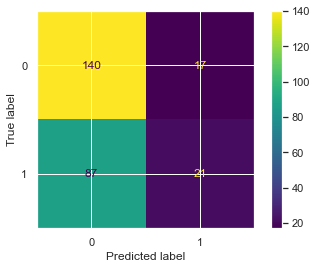

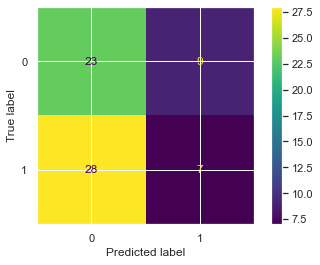

In [30]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)


y_train_pred = BNBclf.predict(x_train) 
y_test_pred = BNBclf.predict(x_test)

print("Train accuracy\t:", accuracy_score(y_train_pred, y_train)) 
print("Test accuracy\t:", accuracy_score(y_test_pred, y_test)) 

"""
print("Train score\t:" + int(BNBclf.score(x_train, y_train))) 
print("Test score\t:" + int(BNBclf.score(x_test, y_test))) 
"""

#confusion matrix for train data 
labels=[0,1]
cm = confusion_matrix(y_train, y_train_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#confusion matrix for test data 
labels=[0,1]
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

<AxesSubplot:>

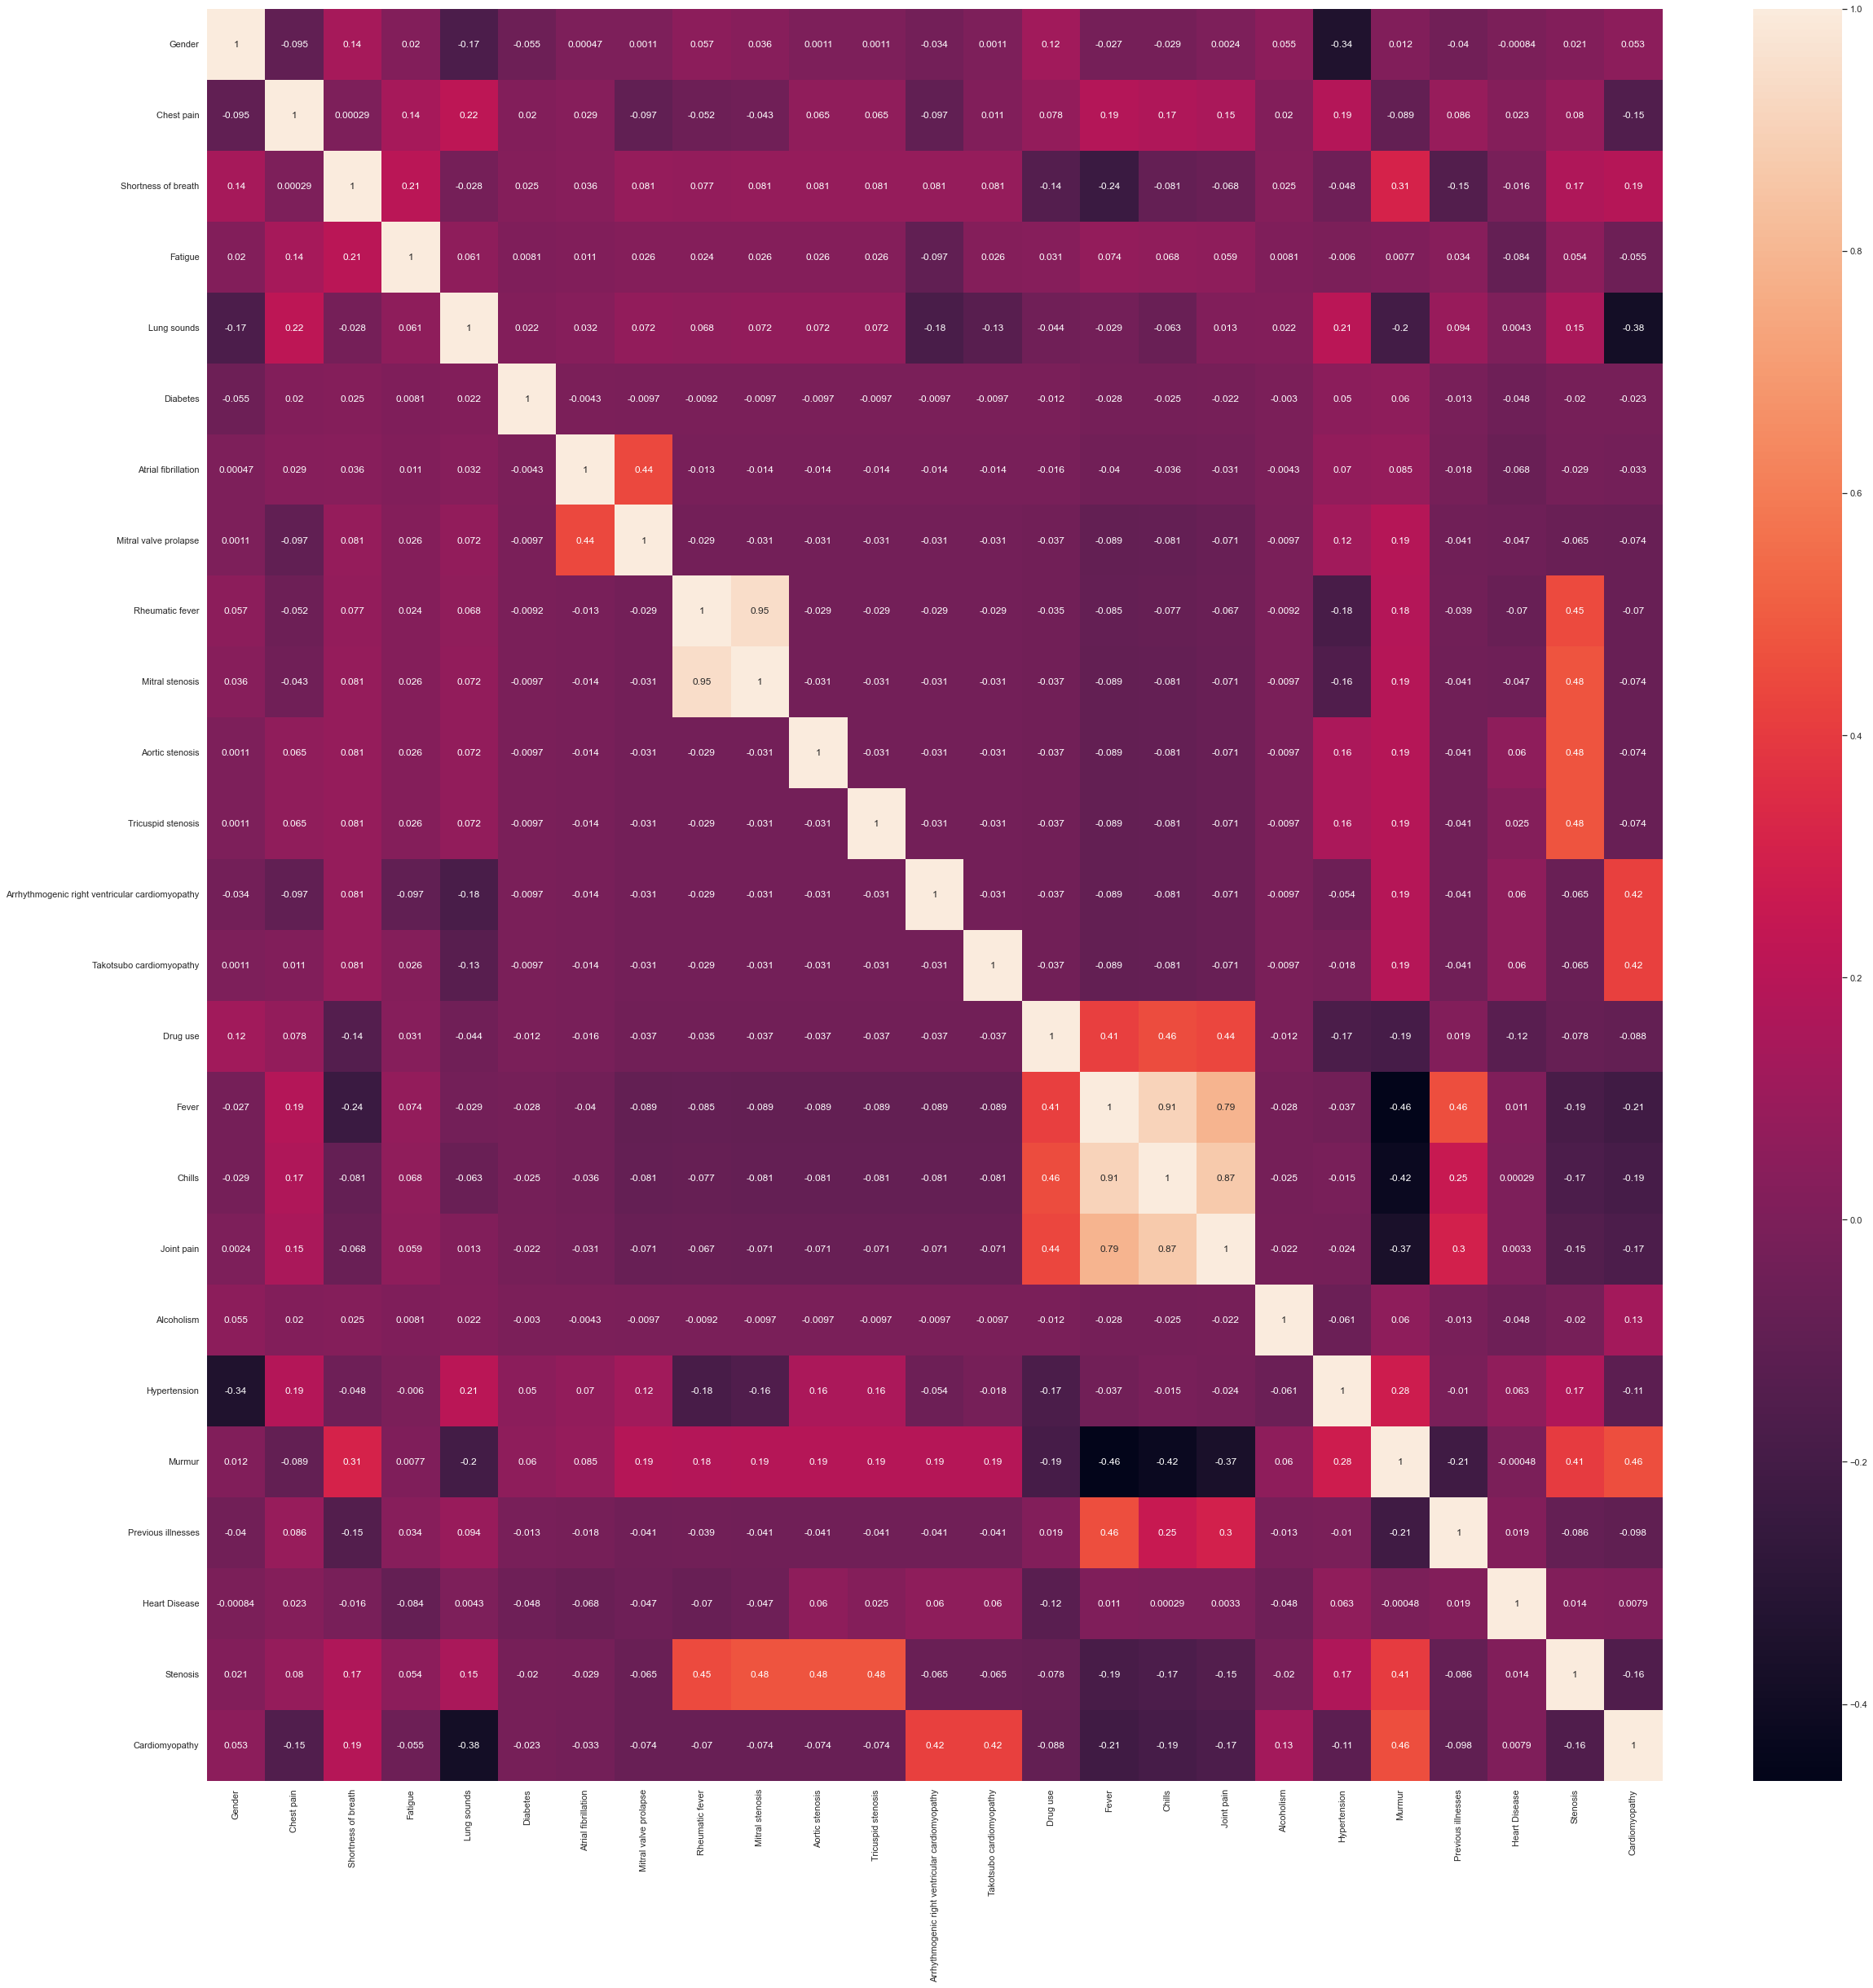

In [31]:
correlations = cat_heartdata.corr()

# plot the heatmap 
plt.figure(figsize=(40,40))
sb.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

In [32]:
cont_heartdata = heartdata.iloc[:,[1, 5, 6, 7, 9, 10, 11, 45]] 
cont_heartdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 333
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        332 non-null    int64
 1   Systolic                   332 non-null    int64
 2   Diastolic                  332 non-null    int64
 3   Heart rate (bpm)           332 non-null    int64
 4   Cholesterol level (mg/dL)  332 non-null    int64
 5   LDL level (mg/dL)          332 non-null    int64
 6   HDL level (mg/dL)          332 non-null    int64
 7   Heart Disease              332 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


In [33]:
cont_heartdata = remove_outliers(cont_heartdata, cont_heartdata["Age"])
cont_heartdata = remove_outliers(cont_heartdata, cont_heartdata["Systolic"])
cont_heartdata = remove_outliers(cont_heartdata, cont_heartdata["Diastolic"])
cont_heartdata = remove_outliers(cont_heartdata, cont_heartdata["Heart rate (bpm)"])
cont_heartdata = remove_outliers(cont_heartdata, cont_heartdata["Cholesterol level (mg/dL)"])
cont_heartdata = remove_outliers(cont_heartdata, cont_heartdata["LDL level (mg/dL)"])
cont_heartdata = remove_outliers(cont_heartdata, cont_heartdata["HDL level (mg/dL)"])
cont_heartdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 333
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        288 non-null    int64
 1   Systolic                   288 non-null    int64
 2   Diastolic                  288 non-null    int64
 3   Heart rate (bpm)           288 non-null    int64
 4   Cholesterol level (mg/dL)  288 non-null    int64
 5   LDL level (mg/dL)          288 non-null    int64
 6   HDL level (mg/dL)          288 non-null    int64
 7   Heart Disease              288 non-null    int64
dtypes: int64(8)
memory usage: 20.2 KB


In [34]:
x = cont_heartdata.drop(columns=["Heart Disease"])
print(x.info())
y = pd.DataFrame(cont_heartdata["Heart Disease"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 333
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        288 non-null    int64
 1   Systolic                   288 non-null    int64
 2   Diastolic                  288 non-null    int64
 3   Heart rate (bpm)           288 non-null    int64
 4   Cholesterol level (mg/dL)  288 non-null    int64
 5   LDL level (mg/dL)          288 non-null    int64
 6   HDL level (mg/dL)          288 non-null    int64
dtypes: int64(7)
memory usage: 18.0 KB
None


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20
)

In [36]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(x_train, np.ravel(y_train))

GaussianNB()

Train accuracy	: 0.5869565217391305
Test accuracy	: 0.5344827586206896


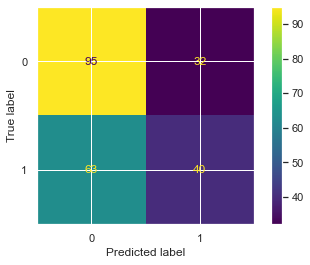

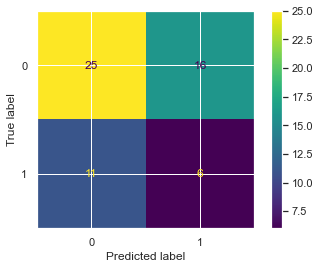

In [37]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)


y_train_pred = GNBclf.predict(x_train) 
y_test_pred = GNBclf.predict(x_test)

print("Train accuracy\t:", accuracy_score(y_train_pred, y_train)) 
print("Test accuracy\t:", accuracy_score(y_test_pred, y_test)) 

"""
print("Train score\t:" + int(BNBclf.score(x_train, y_train))) 
print("Test score\t:" + int(BNBclf.score(x_test, y_test))) 
"""

#confusion matrix for train data 
labels=[0,1]
cm = confusion_matrix(y_train, y_train_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#confusion matrix for test data 
labels=[0,1]
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();